In [206]:
import pandas as pd
import numpy as np

In [208]:
df = pd.read_csv("hoog.csv")

In [210]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
6,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
7,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
8,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [212]:
import pandas as pd

# Assuming your dataframe is named df
# Fill missing values in the 'Age' column with the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing values in the 'Cabin' column with a specified value, for example 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

# For the 'Embarked' column, you can fill missing values with the most frequent value
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)

In [214]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [216]:
X_cat = ['Sex', 'Embarked', 'Pclass']

In [218]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), X_cat)],
                       remainder= 'passthrough')

In [220]:
X = ct.fit_transform(df)

In [222]:
X = np.array(X)
X

array([[1.0, 0.0, 1.0, ..., 'PC 17599', 71.2833, 'C85'],
       [1.0, 0.0, 0.0, ..., '113803', 53.1, 'C123'],
       [0.0, 1.0, 0.0, ..., '17463', 51.8625, 'E46'],
       ...,
       [1.0, 0.0, 1.0, ..., '11767', 83.1583, 'C50'],
       [1.0, 0.0, 0.0, ..., '112053', 30.0, 'B42'],
       [0.0, 1.0, 1.0, ..., '111369', 30.0, 'C148']], dtype=object)

In [224]:
le = LabelEncoder()
y = le.fit_transform(df['Survived'])

In [226]:
y = np.array(y)
y

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1])

In [228]:
from sklearn.model_selection import train_test_split

In [230]:
# X_train, X_test, y_train, y_test = train_test_split(). 

In [232]:
codd = ColumnTransformer(transformers = [('encoder',
                                           OneHotEncoder(),
                                           ['Sex'])], remainder='passthrough'
                         )

In [234]:
codd_data = codd.fit_transform(df)

In [236]:
codd_data

array([[1.0, 0.0, 2, ..., 71.2833, 'C85', 'C'],
       [1.0, 0.0, 4, ..., 53.1, 'C123', 'S'],
       [0.0, 1.0, 7, ..., 51.8625, 'E46', 'S'],
       ...,
       [1.0, 0.0, 880, ..., 83.1583, 'C50', 'C'],
       [1.0, 0.0, 888, ..., 30.0, 'B42', 'S'],
       [0.0, 1.0, 890, ..., 30.0, 'C148', 'C']], dtype=object)

In [238]:
data1 = dict(Income_status = ['Low', 'Mid', 'High', 'High', 'Mid', 'Low',
                         'Mid', 'High', 'Low', 'Mid', 'Mid', 'Low',
                          'High', 'High'], 
        Gadget_Bought = ['Yes', 'Yes', 'Yes', 'Yes', 'No',
                         'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
                        'Yes', 'Yes']
            )

In [240]:
good = pd.DataFrame(data1) 
good

,Income_status,Gadget_Bought
0,Low,Yes
1,Mid,Yes
2,High,Yes
3,High,Yes
4,Mid,No
5,Low,No
6,Mid,Yes
7,High,Yes
8,Low,No
9,Mid,No


<Axes: xlabel='Income_status,Gadget_Bought'>

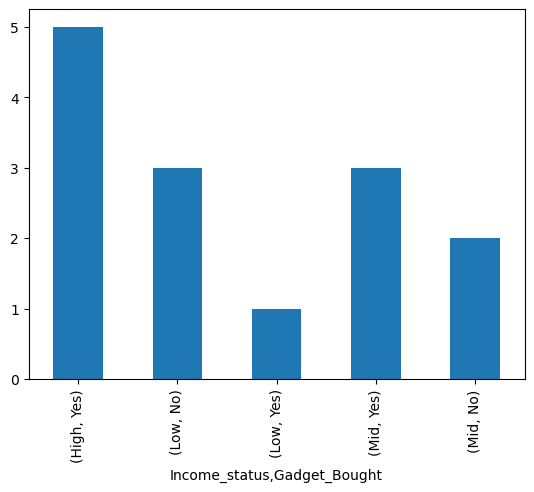

In [242]:
good.groupby('Income_status').value_counts().plot.bar()

In [244]:
v = np.arange(1e2).reshape(20,5)

In [246]:
V= pd.DataFrame(v, columns=['A', 'B', 'C', 'D', 'E'])
V

,A,B,C,D,E
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0
4,20.0,21.0,22.0,23.0,24.0
5,25.0,26.0,27.0,28.0,29.0
6,30.0,31.0,32.0,33.0,34.0
7,35.0,36.0,37.0,38.0,39.0
8,40.0,41.0,42.0,43.0,44.0
9,45.0,46.0,47.0,48.0,49.0


<Axes: >

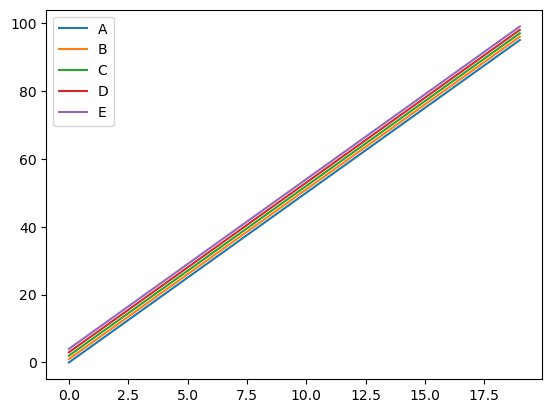

In [248]:
V.plot.line()

In [250]:
np.pi**np.e

22.45915771836104

In [252]:
np.e**np.pi

23.140692632779263

In [254]:
10**3

1000

In [256]:
np.e

2.718281828459045

In [260]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
dataset = pd.read_csv('iris.csv')

# Separate features and target
X = dataset.drop('target', axis=1)
y = dataset['target']
# Split the dataset into an 80-20 training-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply feature scaling on the training and test sets
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)


# Print the scaled training and test sets
print('X_train\n', X_train)
print('X_test\n', X_test)


X_train
 [[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]
 [ 0.59831066 -1.25582892  0.72969227  0.95664273]
 [ 0.72020757  0.30929911  0.44316389  0.4227026 ]
 [-0.74255534  0.98006827 -1.27600637 -1.31260282]
 [-0.98634915  1.20365799 -1.33331205 -1.31260282]
 [-0.74255534  2.32160658 -1.27600637 -1.44608785]
 [-0.01117388 -0.80864948  0.78699794  0.95664273]
 [ 0.23261993  0.75647855  0.44316389  0.55618763]
 [ 1.08589829  0.08570939  0.55777524  0.4227026 ]
 [-0.49876152  1.87442714 -1.39061772 -1.04563275]
 [-0.49876152  1.4272477  -1.27600637 -1.31260282]
 [-0.37686461 -1.47941864 -0.01528151 -0.24472256]
 [ 0.59831066 -0.58505976  0.78699794  0.4227026 ]
 [ 0.72020757  0.08570939  1.01622064  0.8231577 ]
 [ 0.96400139 -0.13788033  0.38585821  0.28921757]
 [ 1.69538284  1.20365

In [196]:
dir(pd)

['ArrowDtype',
 'BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__deprecated_num_index_names',
 '__dir__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_testing',
 '